# Advanced Data Science Capstone - Week 1 - Data Understanding

The dataset is Twitter US Airline Sentiment: https://www.kaggle.com/crowdflower/twitter-airline-sentiment.

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). We will try to infer a customer's perspective for a specific service.

We have 14500 tweets, and 15 columns and  it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines.

In [1]:
# reading data
import pandas as pd

data = pd.read_csv("Tweets.csv")

# checking its dimensions
data.shape

(14640, 15)

In [2]:
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [3]:
# let's have a look in the number of features missing in our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

As we can see, for features airline_sentiment_gold and negativereason_gold we have onyl a handful of values, let's what they represent

In [4]:
data[data.airline_sentiment_gold.notnull()].head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2135,569343661063823360,neutral,1.0000,NaN,NaN,United,neutral,aushianya,NaN,0,@united I have a question,NaN,2015-02-21 19:51:21 -0800,NaN,NaN
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)


These values are the same for other columns as *airline_sentiment* and *negativereason*, I will drop them without information loss. Also, *tweet_coord* represents the coordinate of the tweet, as we have a lot of null values and with the features  *tweet_location*, we will drop it as well.

In [5]:
data = data.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis = 1)
data.shape

(14640, 12)

Now, we also have null values for the following features: *negativereason*, *negativereason_confidence*, *tweet_location*, *user_timezone*. Let's dig deeper into it.

In [6]:
data[data.negativereason.isnull()].head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


We can say that *negativereason* being null is related to the airline_sentiment being either neutral, or positive. Therefore, we just assign when appropriate the same value as for column airline_sentiment. We can say the same about *negativereason_confidence* column, then it will be just the 0 for all these cases.

In [7]:
data[data.negativereason.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5462 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      5462 non-null   int64  
 1   airline_sentiment             5462 non-null   object 
 2   airline_sentiment_confidence  5462 non-null   float64
 3   negativereason                0 non-null      object 
 4   negativereason_confidence     1344 non-null   float64
 5   airline                       5462 non-null   object 
 6   name                          5462 non-null   object 
 7   retweet_count                 5462 non-null   int64  
 8   text                          5462 non-null   object 
 9   tweet_created                 5462 non-null   object 
 10  tweet_location                3871 non-null   object 
 11  user_timezone                 3812 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 554.7+ KB


Here, we confirm our approach, we can see that for all null values for *negativereason*, we have *airline_sentiment* with non-null values.

It's important to note that by my methodology approach, we are only treating these cases and features to visualization purposes, in order to understand better why we have negative values and how we can use it in our model. For me, we can not use a feature such as *negativereason* to predict *airline_sentiment* because this would be a classical data leakage example, i.e., we would be using information that would not be available in a real environment. In a real case setting, we would have only tweet's features as well as the message. Now, it is also true that the *negativereason* could be taken directly from the tweet, and, aligned with its probability information, we could use it for prediction. Let's explore how this column is created.

In [8]:
# let's get some examples for negativereason

data[data.negativereason.notnull()][['negativereason', 'text']][:5].values

array([['Bad Flight',
        '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'],
       ["Can't Tell",
        "@VirginAmerica and it's a really big bad thing about it"],
       ["Can't Tell",
        "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA"],
       ['Late Flight', '@VirginAmerica SFO-PDX schedule is still MIA.'],
       ['Bad Flight',
        "@VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!"]],
      dtype=object)

As it is clear, they are not taken directly from the text, therefore we will not use as a predictor, just for visualization purposes.

Let's start now with some visualizations. First, how many tweets we have per airline and separated by its classes?

Text(0.5, 1.0, 'Sentiment Distribution per Airline Company')

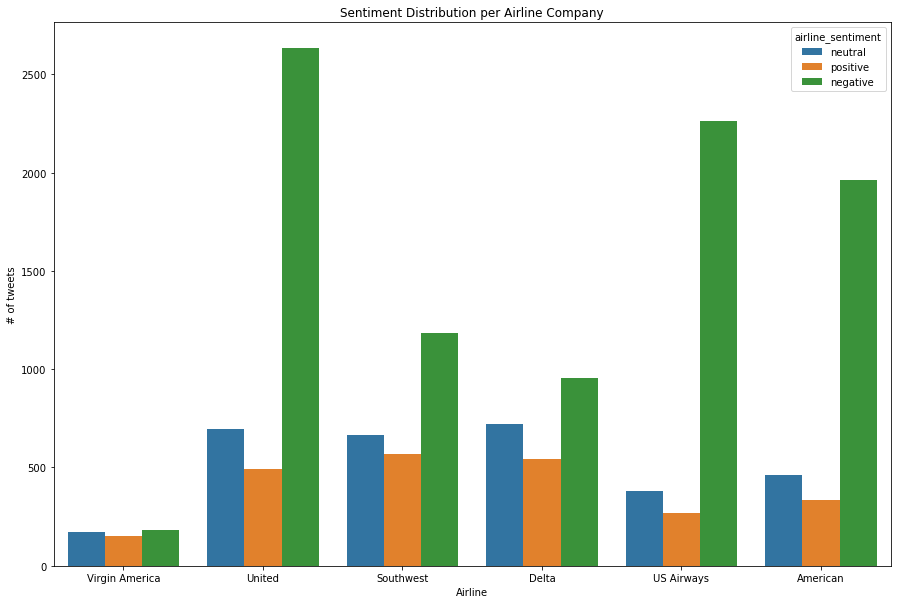

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="airline", hue="airline_sentiment", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
ax.set_title('Sentiment Distribution per Airline Company')

In [10]:
data.airline_sentiment.value_counts(normalize=False)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0, 0.5, '# of tweets')

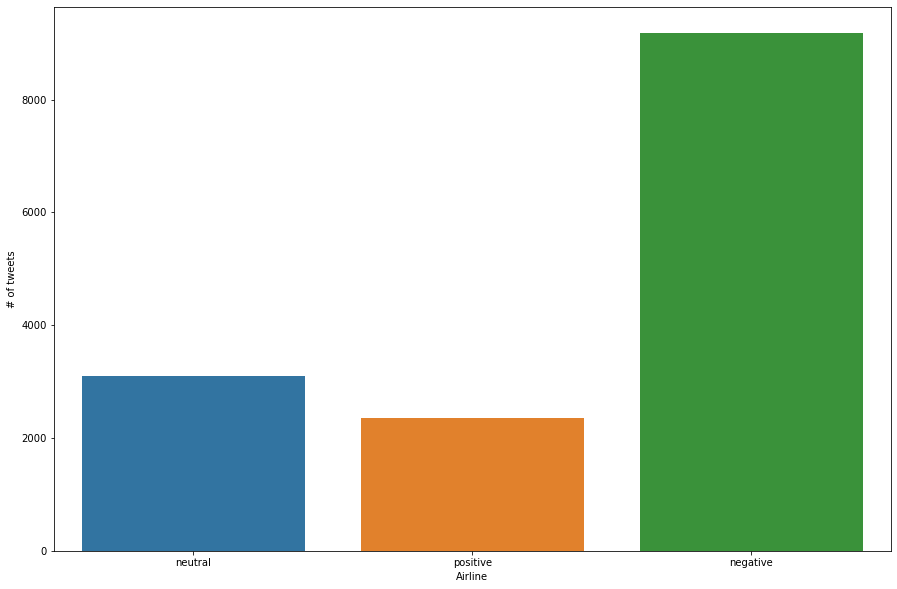

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="airline_sentiment", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')

How it is the confidence distribution per airline and in total?

C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

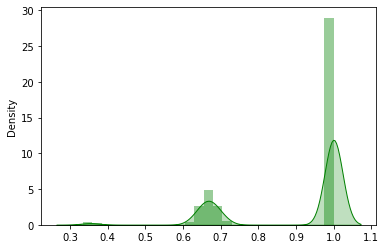

In [12]:
sns.distplot(data.airline_sentiment_confidence.values, hist = True, color = "g", rug = False, kde_kws = {"shade": True})

In [13]:
data.airline_sentiment_confidence.unique()

array([1.    , 0.3486, 0.6837, ..., 0.6384, 0.7094, 0.3487])

C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

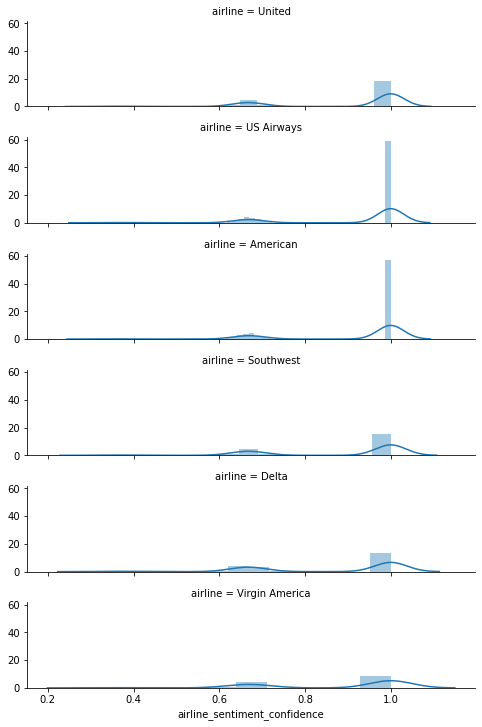

In [14]:
ordered_days = data.airline.value_counts().index
g = sns.FacetGrid(data, row="airline", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "airline_sentiment_confidence", hist=True, rug=False);

Again, inferring from values above, and taking in consideration we know that for every tweet, three people rated it, we can say that the confidence is based on how the votes were distributed. Therefore, 100% means that three votes were given to that specific class and we are more confident about it.

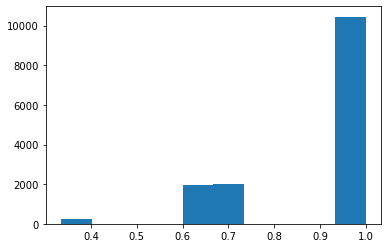

In [15]:
ax = plt.hist(data.airline_sentiment_confidence.values)

Now, how user time zone is distributed?

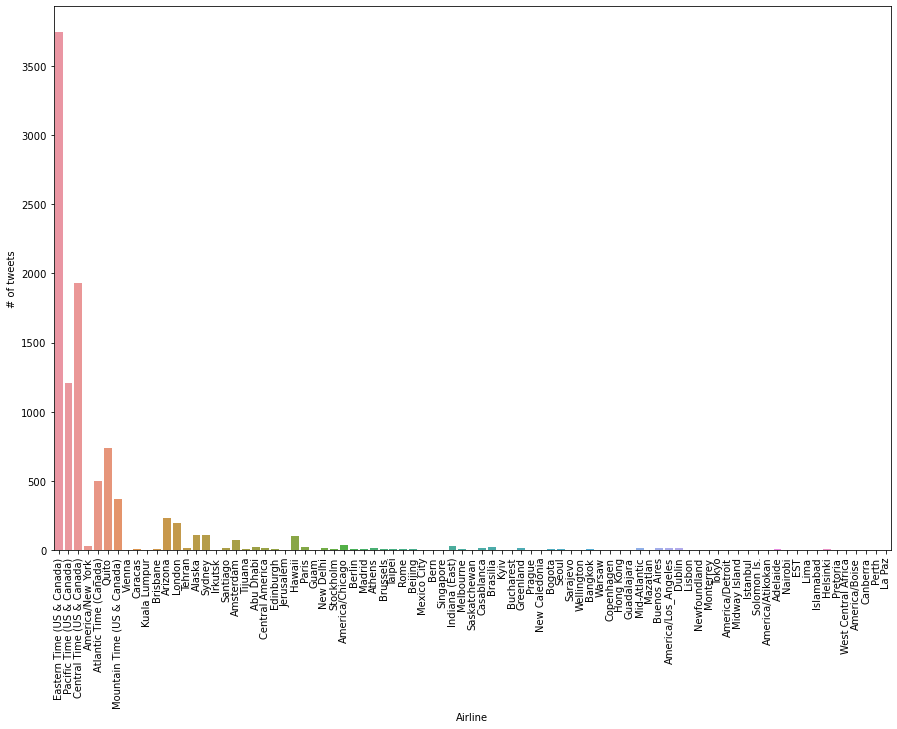

In [16]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="user_timezone", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

Most tweets come from time zone US & Canada, let's how they are distributed related to quality of the flight.

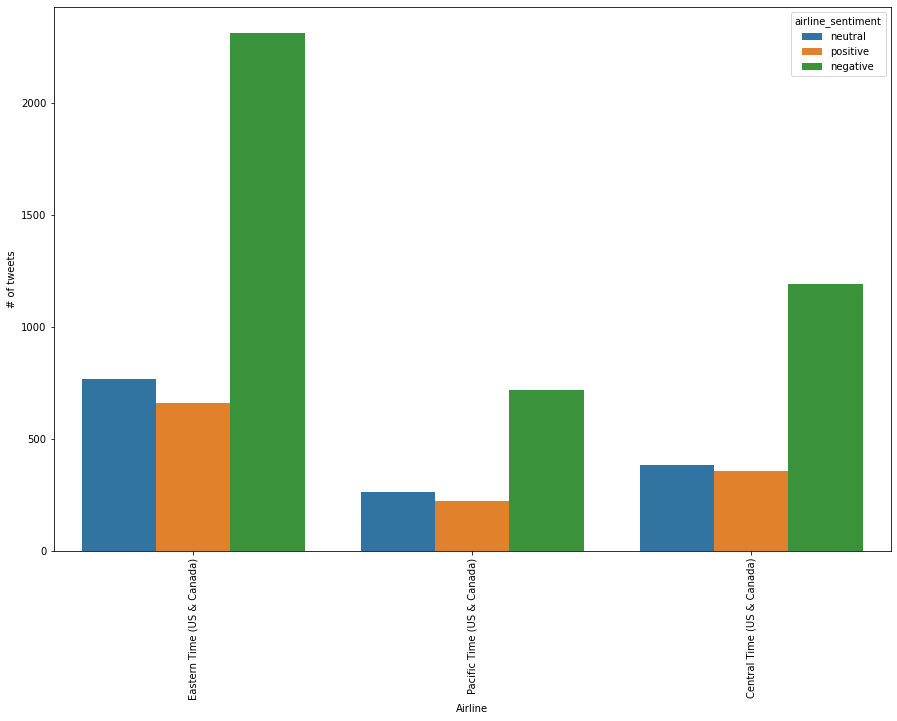

In [17]:
f, ax = plt.subplots(figsize=(15, 10))

time_zones = list(data.user_timezone.value_counts().index[0:3])
ax = sns.countplot(x="user_timezone", hue='airline_sentiment', data=data[data.user_timezone.isin(time_zones)])
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

As expected, we see the same distribution for all three timezones. Now, let's group the other 7 with most tweets and give it a look.

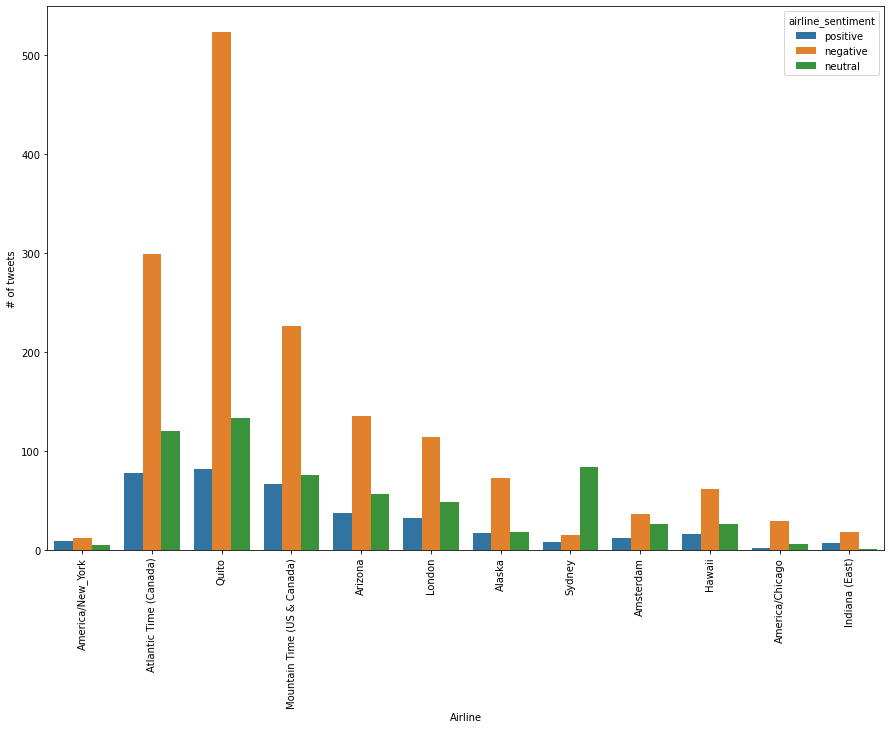

In [18]:
f, ax = plt.subplots(figsize=(15, 10))

time_zones = list(data.user_timezone.value_counts().index[3:15])
ax = sns.countplot(x="user_timezone", hue='airline_sentiment', data=data[data.user_timezone.isin(time_zones)])
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

And for the data that is null

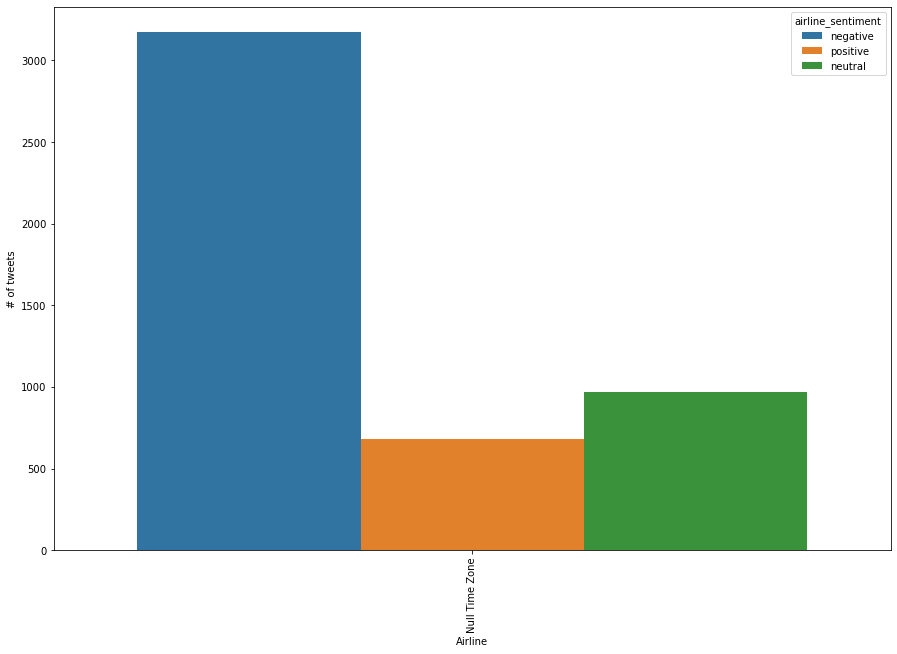

In [19]:
f, ax = plt.subplots(figsize=(15, 10))

time_zones = list(data.user_timezone.value_counts().index[3:15])
ax = sns.countplot(x="user_timezone", hue='airline_sentiment', data=data[data.user_timezone.isnull()].fillna(value='Null Time Zone'))
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

We can clearly see that the time zone has no significant information to separate the class. This could means that a service from an Airline could be better in one region than another, but that is not what is happening here.

Now, we need to do a preprocessing step in order to visualize which words are more frequent for positive, negative and neutral sentiments. This will be done again in ETL and modelling parts of the notebook.

In [20]:
# first, let's count the # used in this dataset

from collections import Counter

words = [w for word in data.text.values for w in word.split()]
hashtags = [h for h in words if h.startswith('#')]

counter_hash = Counter(hashtags)
counter_hash.most_common()[0:20]

[('#', 88),
 ('#DestinationDragons', 71),
 ('#fail', 52),
 ('#jetblue', 35),
 ('#UnitedAirlines', 33),
 ('#customerservice', 32),
 ('#usairwaysfail', 26),
 ('#AmericanAirlines', 22),
 ('#disappointed', 20),
 ('#avgeek', 19),
 ('#badservice', 19),
 ('#neveragain', 17),
 ('#help', 16),
 ('#travel', 16),
 ('#united', 15),
 ('#USAirways', 15),
 ('#usairways', 15),
 ('#frustrated', 14),
 ('#badcustomerservice', 14),
 ('#nothappy', 11)]

Here, we can see that some hashtags are directly related to the review given by the rater. This is could be crucial information for using in a predictive model, that is, we could create a feature based on this hashtag information to help us deciding the sentiment about the tweet.

In [21]:
# now, let's see about emoticons
import string

emoticons_str = [':D', ':/', ':)', ':(', ':]', ':[', 'Oo']
emoticons = [word for word in words if word in emoticons_str]
Counter(emoticons).most_common()[0:10]

[(':)', 140), (':(', 87), (':/', 17), (':D', 8)]

Let's see some tweets that have the positive emoticon (inferred) to see if our hypothesis confirm, that is, that customers using this specific emoticon have had a positive experience.

In [22]:
def has_emoticon(x,  positive=True):
    if positive:
        words = x.split()
        negative_emoticons = [':/', ':(', ':[', 'D:']
        positive_emoticons = [':)', ':D', ':]']
        
        neg = [word for word in words if word in negative_emoticons]
        pos = [word for word in words if word in positive_emoticons]
        
        if len(neg) > len(pos):
            return 'emoticon_negative'
        elif len(pos) > len(neg):
            return 'emoticon_positive'
        else:
            return 'emoticon_neutral'

data['emoticon_sentiment'] = data.text.apply(lambda x: has_emoticon(x))

Text(0, 0.5, '# of tweets')

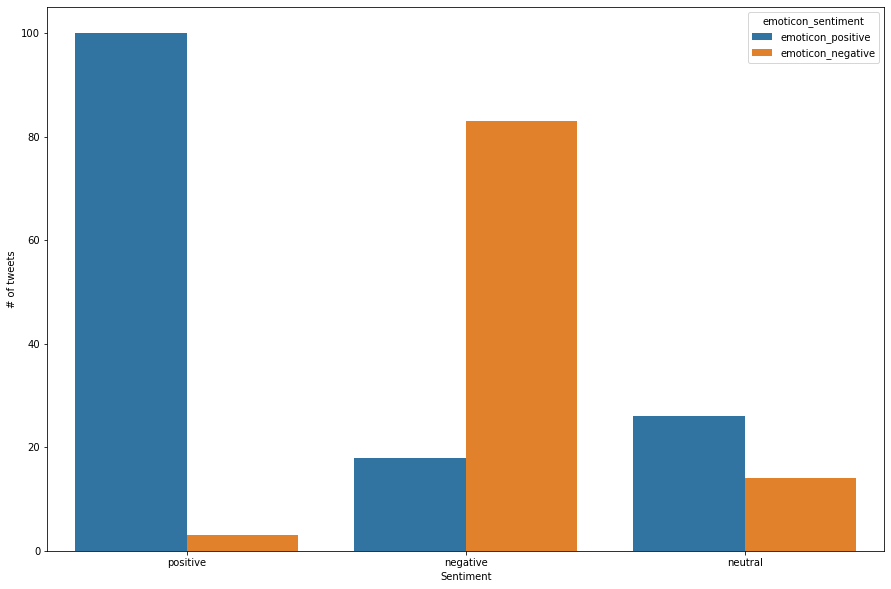

In [23]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="airline_sentiment", hue='emoticon_sentiment', data=data[data.emoticon_sentiment!='emoticon_neutral'])
ax.set_xlabel('Sentiment')
ax.set_ylabel('# of tweets')

In [24]:
data.groupby(['airline_sentiment', 'emoticon_sentiment']).size()

airline_sentiment  emoticon_sentiment
negative           emoticon_negative       83
                   emoticon_neutral      9077
                   emoticon_positive       18
neutral            emoticon_negative       14
                   emoticon_neutral      3059
                   emoticon_positive       26
positive           emoticon_negative        3
                   emoticon_neutral      2260
                   emoticon_positive      100
dtype: int64

Although it is slightly perceptible, we have some correlation between emoticons and reviews, so this could be another feature for future using in modelling our problem.

Now, let's counting the terms and visualize them compared to the classes.

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


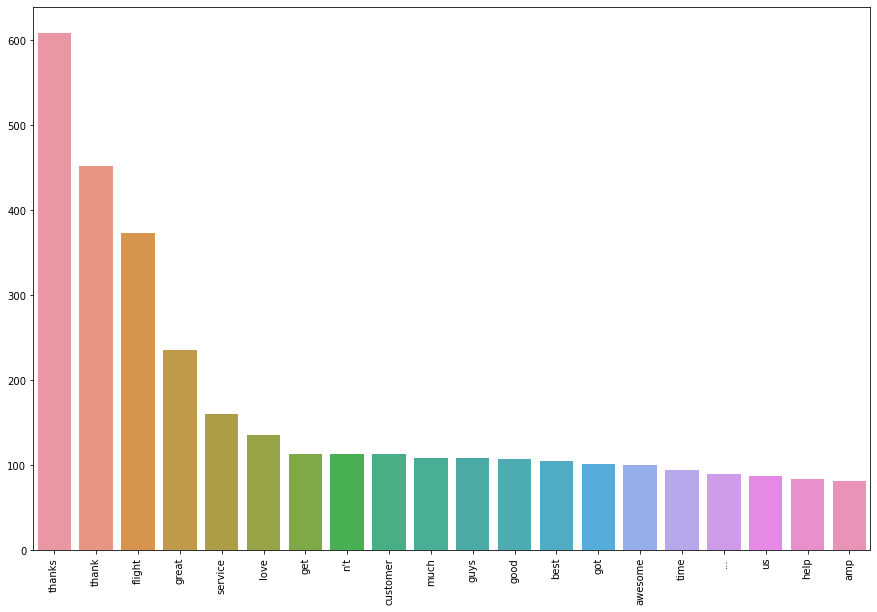

In [25]:
# we need to remove stop words, and now the punctuation will not be necessary anymore
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

positive_tweets = data[data.airline_sentiment=='positive']['text'].values
negative_tweets = data[data.airline_sentiment=='negative']['text'].values

positive_tweets = [w for tweet in positive_tweets for w in word_tokenize(tweet)]
negative_tweets = [w for tweet in negative_tweets for w in  word_tokenize(tweet)]


punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via'] +['jetblue', 'southwestair','united', 'americanair', 'usairways',
                                                                 'http', '\'s', 'virginamerica']

terms_positive = [term.lower() for term in positive_tweets if term.lower() not in stop]

count_terms = Counter(terms_positive)

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(list(list(zip(*count_terms.most_common()[0:20]))[0]), list(list(zip(*count_terms.most_common()[0:20]))[1]))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

As expected, in positive reviews we have the word thank appearing more times than the others ones. Let's do the same for negative reviews.

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


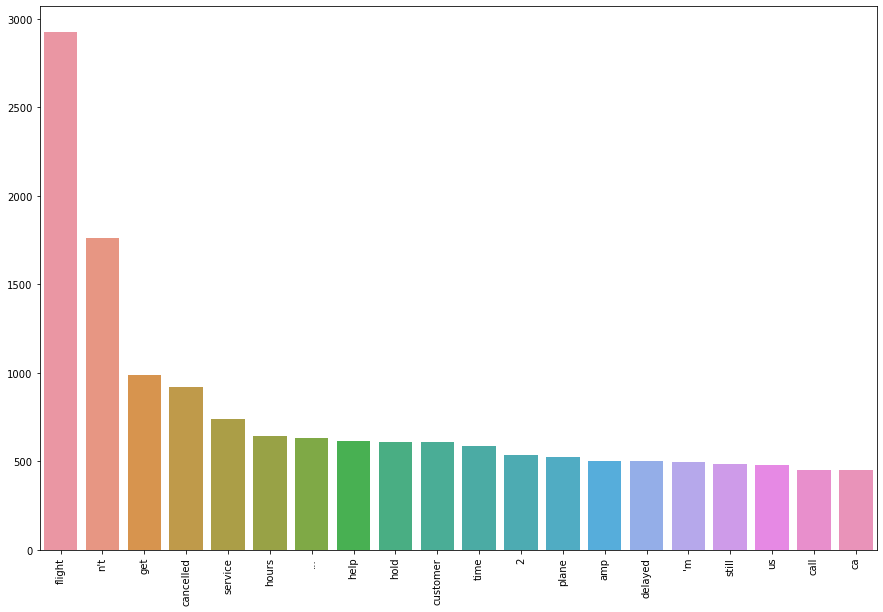

In [26]:
terms_negative = [term.lower() for term in negative_tweets if term.lower() not in stop]

count_terms = Counter(terms_negative)

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(list(list(zip(*count_terms.most_common()[0:20]))[0]), list(list(zip(*count_terms.most_common()[0:20]))[1]))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

Here, we have flights as the first most common word. The reason could be that negative tweets are complainings about something that happened during a flight time, indicating that a operational problem rather than a marketing one is the majority of tweets negative sentiments.

Again, we could use this information in our sentiment classification task. Feature engineering is one of the fundamentals part of a data science project, therefore now we are going to process information in order to achieve the highest score os test set. The following part will be about feature engineering and the ETL process. My goal here is to contrast this approach using Deep Learning in the modelling session, i.e., I want to try out models with feature engineering done manually, and the ones where the model extract the features using LSTM, and Convolutional Layers as well as embeddings terms.